🔹 Información general del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57231 entries, 0 to 57230
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           57231 non-null  object
 1   Label        57231 non-null  int64 
 2   Titulo       57231 non-null  object
 3   Descripcion  57231 non-null  object
 4   Fecha        57231 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.2+ MB
None
       ID  Label                                             Titulo  \
12920  ID      0  Rita Maestre anuncia que España aportará un mi...   
31978  ID      1  Sánchez busca eliminar el veto del Senado al t...   
38720  ID      1  El Ayuntamiento de Barcelona pide ilegalizar l...   
43315  ID      1  Descuelgan la pancarta en favor de los presos ...   
4703   ID      1  La Junta Electoral justifica la inclusión de T...   

                                             Descripcion       Fecha  
12920  El presiden

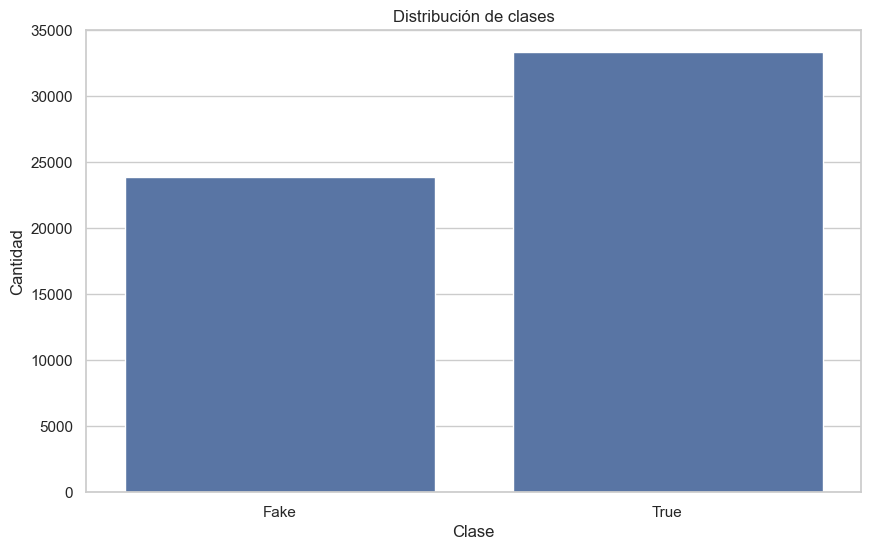

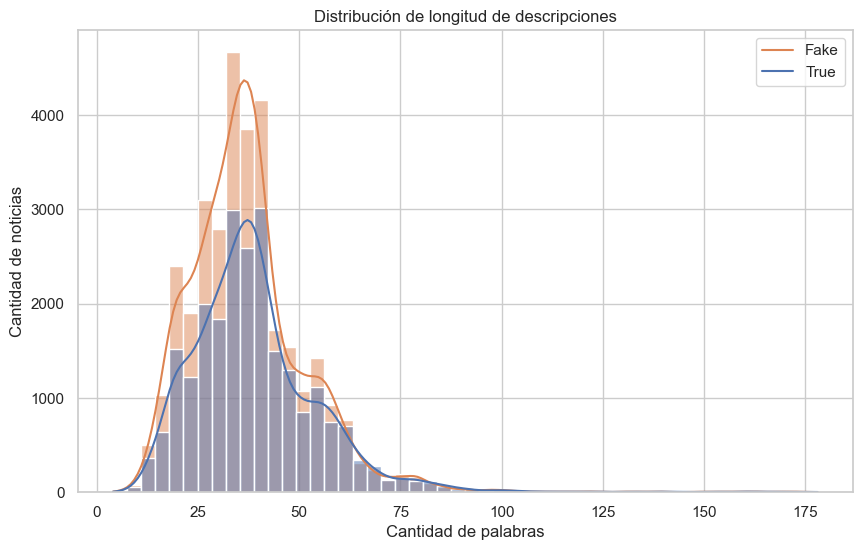


🔹 Valores nulos por columna:
ID             0
Label          0
Titulo         0
Descripcion    0
Fecha          0
desc_length    0
dtype: int64

🔹 Duplicados:
462


In [2]:
# 01_exploracion.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuración visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# Ruta del archivo
dataset_path = os.path.join("..", "data", "raw", "D57000_complete.csv")

# Cargar el dataset
df = pd.read_csv(dataset_path, sep=";", encoding="utf-8", encoding_errors="replace")

# Mostrar información general
print("🔹 Información general del dataset")
print(df.info())
print(df.sample(5))

# Verificar columnas esperadas
print("🔹 Columnas:", df.columns.tolist())

# Ver distribución de clases
print("\n🔹 Distribución de clases:")
print(df["Label"].value_counts())

sns.countplot(data=df, x="Label")
plt.xticks([0,1], ['Fake', 'True'])
plt.title("Distribución de clases")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.show()

# Análisis de longitud de la descripción
df["desc_length"] = df["Descripcion"].astype(str).apply(lambda x: len(x.split()))

sns.histplot(data=df, x="desc_length", hue="Label", bins=50, kde=True)
plt.title("Distribución de longitud de descripciones")
plt.xlabel("Cantidad de palabras")
plt.ylabel("Cantidad de noticias")
plt.legend(labels=["Fake", "True"])
plt.show()

# Verificar valores nulos
print("\n🔹 Valores nulos por columna:")
print(df.isnull().sum())

# Verificar duplicados
print("\n🔹 Duplicados:")
print(df.duplicated().sum())